In [5]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Cleaned Dataset
df = pd.read_csv("C:\\Users\\AAKHIL MOHAMMAD\\Downloads\\Cleaned_Shark_Tank_India.csv")




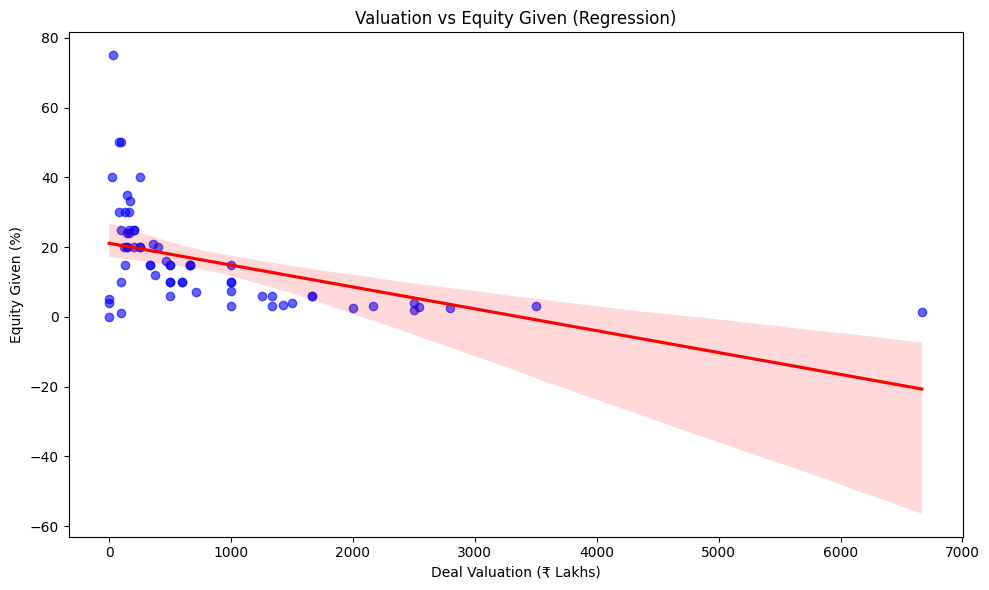

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=successful_deals,
    x="deal_valuation",
    y="deal_equity",
    scatter_kws={'alpha': 0.6},
    line_kws={"color": "red"},
    color="blue"
)
plt.title("Valuation vs Equity Given (Regression)")
plt.xlabel("Deal Valuation (₹ Lakhs)")
plt.ylabel("Equity Given (%)")
plt.tight_layout()
plt.show()



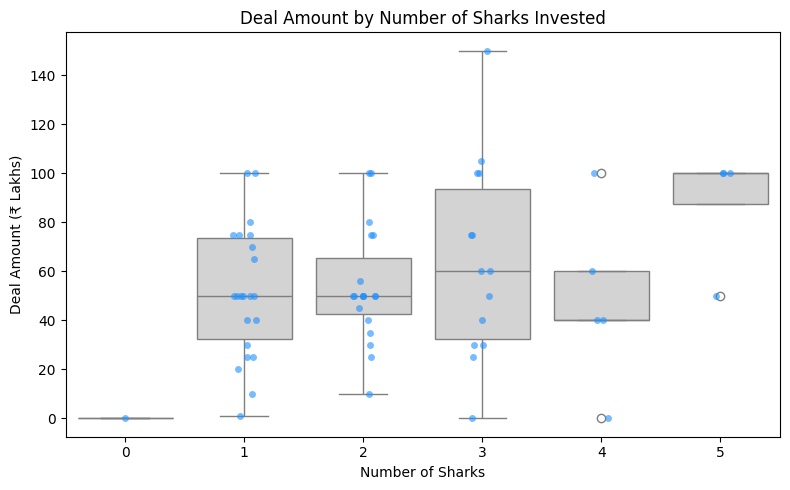

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=successful_deals, x="total_sharks_invested", y="deal_amount", color="lightgray")
sns.stripplot(data=successful_deals, x="total_sharks_invested", y="deal_amount", color="dodgerblue", alpha=0.6, jitter=True)
plt.title("Deal Amount by Number of Sharks Invested")
plt.xlabel("Number of Sharks")
plt.ylabel("Deal Amount (₹ Lakhs)")
plt.tight_layout()
plt.show()


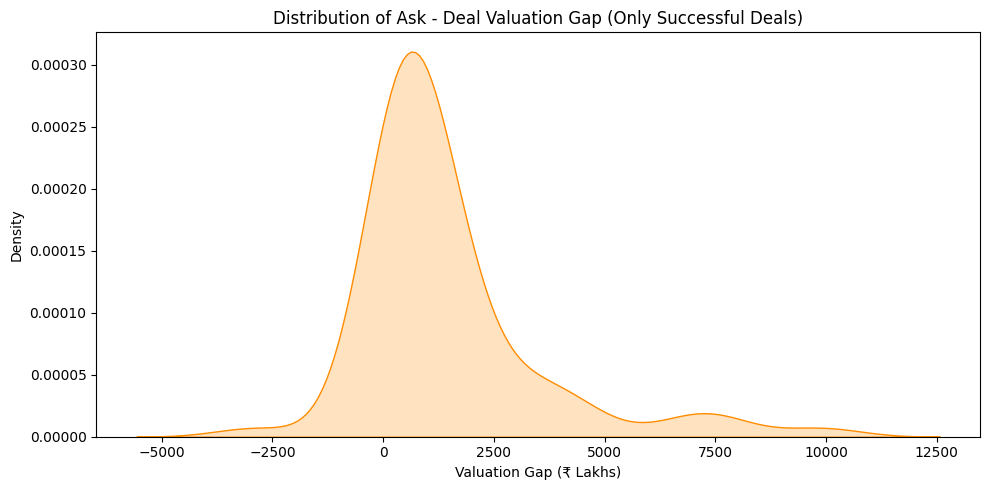

In [15]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df["deal"] == 1]["valuation_gap"], fill=True, color="darkorange")
plt.title("Distribution of Ask - Deal Valuation Gap (Only Successful Deals)")
plt.xlabel("Valuation Gap (₹ Lakhs)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


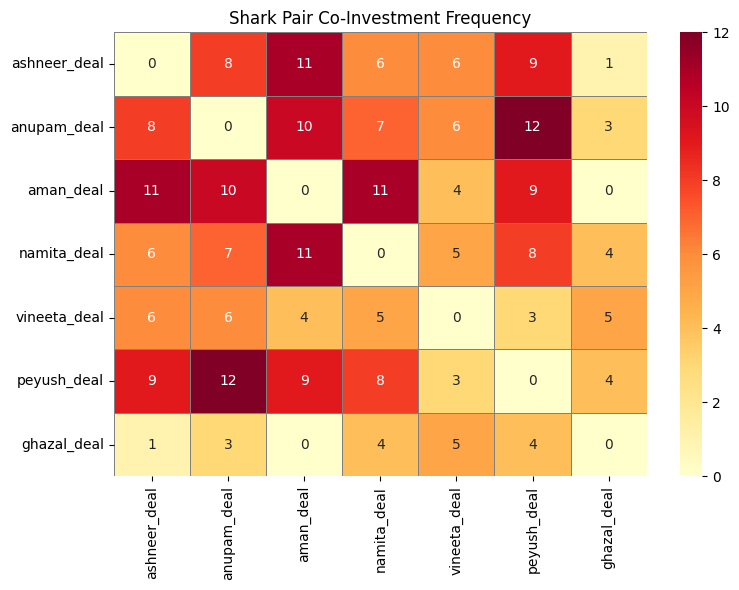

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(shark_matrix, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, linecolor='gray')
plt.title("Shark Pair Co-Investment Frequency")
plt.tight_layout()
plt.show()


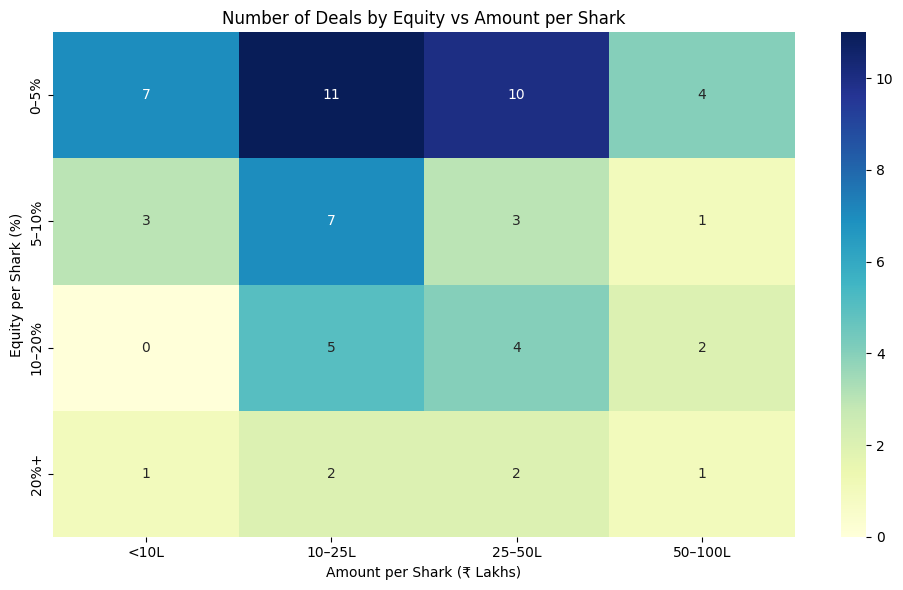

In [18]:
# Create bins for equity and amount
df_binned = successful_deals.copy()
df_binned["Equity Bin"] = pd.cut(df_binned["equity_per_shark"], bins=[0, 5, 10, 20, 50], labels=["0–5%", "5–10%", "10–20%", "20%+"])
df_binned["Amount Bin"] = pd.cut(df_binned["amount_per_shark"], bins=[0, 10, 25, 50, 100, 200], labels=["<10L", "10–25L", "25–50L", "50–100L", "100L+"])

# Pivot table to count frequency
pivot = pd.crosstab(df_binned["Equity Bin"], df_binned["Amount Bin"])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Deals by Equity vs Amount per Shark")
plt.xlabel("Amount per Shark (₹ Lakhs)")
plt.ylabel("Equity per Shark (%)")
plt.tight_layout()
plt.show()



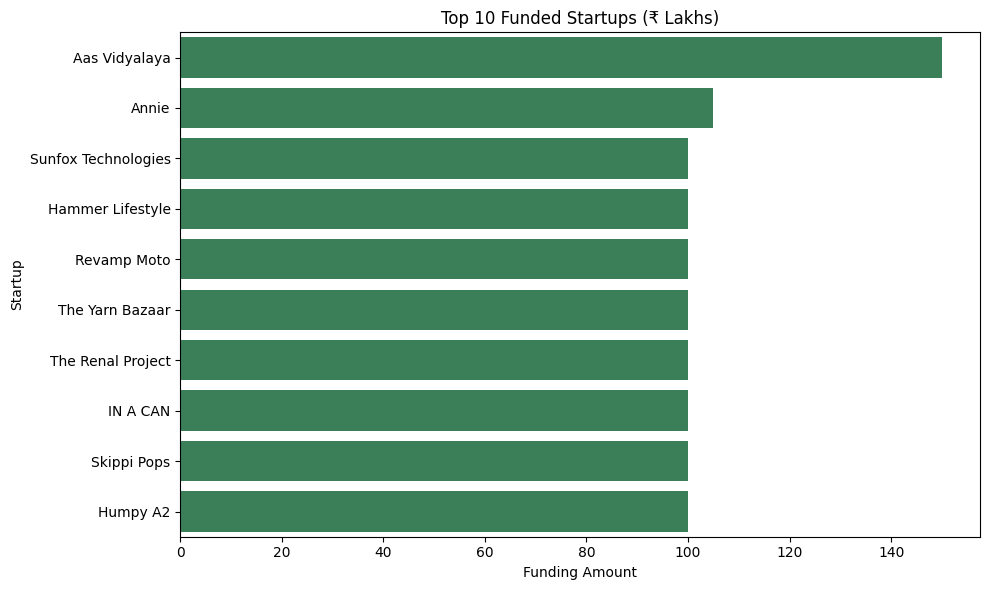

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x="deal_amount", y="brand_name", data=top_funded, color="seagreen")
plt.title("Top 10 Funded Startups (₹ Lakhs)")
plt.xlabel("Funding Amount")
plt.ylabel("Startup")
plt.tight_layout()
plt.show()


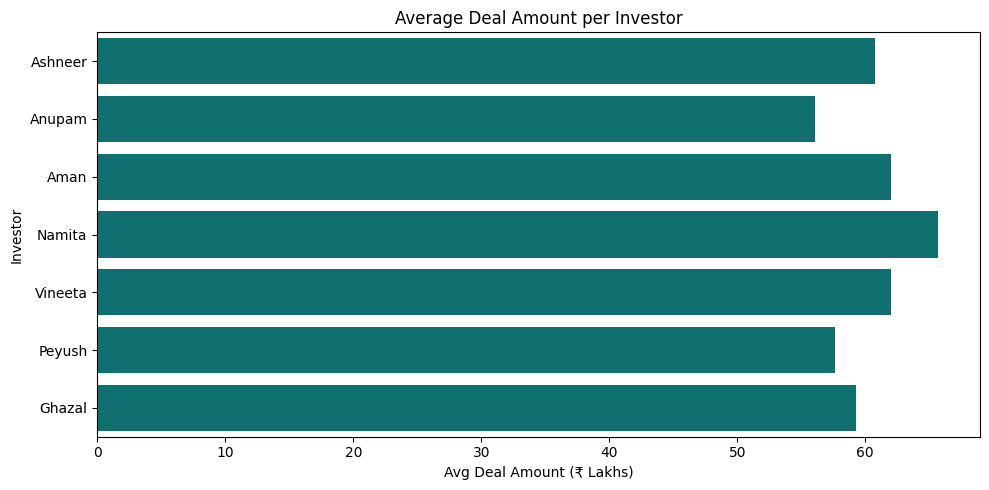

In [23]:
investors = [col for col in df.columns if "_deal" in col and col != "deal"]
investor_deals = df[df["deal"] == 1]

avg_investment = {
    investor.replace("_deal", "").title(): investor_deals[investor_deals[investor] == 1]["deal_amount"].mean()
    for investor in investors
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(avg_investment.values()), y=list(avg_investment.keys()), color="teal")
plt.title("Average Deal Amount per Investor")
plt.xlabel("Avg Deal Amount (₹ Lakhs)")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()
